In [9]:
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
import urllib
import os
import glob
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train_dir='/content/gdrive/My Drive/transferlearning_wo_segmen_w_augmen_data/train'
val_dir='/content/gdrive/My Drive/transferlearning_wo_segmen_w_augmen_data/val'


train_gen = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    shuffle = True,
    image_size = (192, 192)
)
val_gen = tf.keras.utils.image_dataset_from_directory(
    directory = val_dir,
    shuffle = True,
    image_size = (192, 192)
)

Found 800 files belonging to 2 classes.
Found 146 files belonging to 2 classes.


In [5]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (192,192,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
# base_model.trainable = False
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# feature_batch_average = global_average_layer(feature_batch)
# print(feature_batch_average.shape)
base_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)

model = tf.keras.Sequential([
  # tf.keras.layers.RandomFlip('horizontal'),
  # tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.Rescaling(1./255),
  base_model,
  global_average_layer,
  prediction_layer
])
# model = tf.keras.Model(model)

In [7]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [8]:
history = model.fit(train_gen,
                    epochs=100,
                    validation_data=val_gen)

Epoch 1/100
25/25 [==============================] - 99s 3s/step - loss: 4.2590 - accuracy: 0.5269 - val_loss: 4.3760 - val_accuracy: 0.5582
Epoch 2/100
25/25 [==============================] - 39s 2s/step - loss: 3.7538 - accuracy: 0.5475 - val_loss: 3.7687 - val_accuracy: 0.5479
Epoch 3/100
25/25 [==============================] - 39s 2s/step - loss: 3.5759 - accuracy: 0.5625 - val_loss: 4.2259 - val_accuracy: 0.5651
Epoch 4/100
25/25 [==============================] - 41s 1s/step - loss: 3.4145 - accuracy: 0.5731 - val_loss: 3.7323 - val_accuracy: 0.5753
Epoch 5/100
25/25 [==============================] - 35s 1s/step - loss: 3.2565 - accuracy: 0.5806 - val_loss: 3.6861 - val_accuracy: 0.5856
Epoch 6/100
25/25 [==============================] - 40s 1s/step - loss: 3.1662 - accuracy: 0.5850 - val_loss: 3.6243 - val_accuracy: 0.5582
Epoch 7/100
25/25 [==============================] - 40s 2s/step - loss: 3.1262 - accuracy: 0.5944 - val_loss: 4.0066 - val_accuracy: 0.5685
Epoch 8/100
2

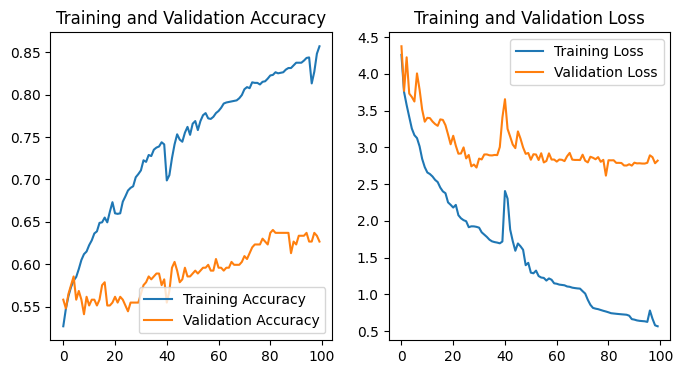

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("epoch_100_mobilenet_wo_segm_w_augmen.png")
plt.show()

### VGG16

In [21]:
input_size=(192,192,3)
vgg_model=tf.keras.applications.VGG16(input_shape=input_size,include_top=False,weights='imagenet')

vgg_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)

vggs_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  vgg_model,
  global_average_layer,
  prediction_layer
])

In [22]:
base_learning_rate = 0.0001
vggs_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [24]:
history_vgg = vggs_model.fit(train_gen,
                    epochs=10,
                    validation_data=val_gen)

Epoch 1/10
25/25 [==============================] - 465s 19s/step - loss: 4.3527 - accuracy: 0.4988 - val_loss: 4.2782 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 452s 18s/step - loss: 4.3015 - accuracy: 0.4975 - val_loss: 4.2588 - val_accuracy: 0.4932
Epoch 3/10
25/25 [==============================] - 452s 18s/step - loss: 4.2778 - accuracy: 0.4931 - val_loss: 4.2476 - val_accuracy: 0.4863
Epoch 4/10
25/25 [==============================] - 450s 18s/step - loss: 4.2598 - accuracy: 0.4938 - val_loss: 4.2395 - val_accuracy: 0.4966
Epoch 5/10
25/25 [==============================] - 451s 18s/step - loss: 4.2505 - accuracy: 0.4869 - val_loss: 4.2333 - val_accuracy: 0.4863
Epoch 6/10
25/25 [==============================] - 454s 18s/step - loss: 4.2440 - accuracy: 0.4812 - val_loss: 4.2294 - val_accuracy: 0.4795
Epoch 7/10
25/25 [==============================] - 449s 18s/step - loss: 4.2393 - accuracy: 0.4725 - val_loss: 4.2268 - val_accuracy: 0.4726
Epoch 

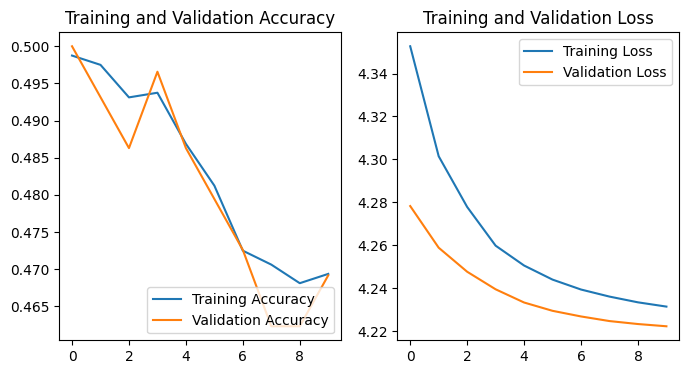

In [26]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("epoch_100_vgg_wo_segm_w_augmen.png")
plt.show()

### EfficientNetB2

In [30]:
input_size=(192,192,3)
effic_model=tf.keras.applications.EfficientNetB2(input_shape=input_size,include_top=False,weights='imagenet')

effic_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)

effics_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  effic_model,
  global_average_layer,
  prediction_layer
])

31790344/31790344 [==============================] - 0s 0us/step


In [31]:
base_learning_rate = 0.0001
effics_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [33]:
history_effic = effics_model.fit(train_gen,
                    epochs=50,
                    validation_data=val_gen)

Epoch 1/50
25/25 [==============================] - 101s 4s/step - loss: 0.7481 - accuracy: 0.5000 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 2/50
25/25 [==============================] - 98s 4s/step - loss: 0.7069 - accuracy: 0.5006 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 3/50
25/25 [==============================] - 95s 4s/step - loss: 0.6985 - accuracy: 0.4888 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 4/50
25/25 [==============================] - 95s 4s/step - loss: 0.6969 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
25/25 [==============================] - 88s 3s/step - loss: 0.6940 - accuracy: 0.4975 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/50
25/25 [==============================] - 86s 3s/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6928 - val_accuracy: 0.5068
Epoch 7/50
25/25 [==============================] - 96s 4s/step - loss: 0.6968 - accuracy: 0.4906 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 8/50
25/25 [=

KeyboardInterrupt: 

In [ ]:
acc = history_effic.history['accuracy']
val_acc = history_effic.history['val_accuracy']

loss = history_effic.history['loss']
val_loss = history_effic.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("epoch_100_inception_wo_segm_w_augmen.png")
plt.show()